In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import  crosstab

In [31]:
df =  pd.read_csv("Experimentaciones.csv", encoding='latin-1')

In [34]:
df2 =  pd.read_csv("data_generated.csv", encoding='latin-1')

In [35]:
df2

,SEÑA ESPERADA,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2
0,A,1,101035.253,10,2,1,82784.400,9,1,1,95536.649,9,1
1,B,1,49944.526,7,2,0,58226.443,6,2,1,47404.962,5,3
2,BN,1,124366.082,10,2,1,72196.465,6,3,1,110718.608,9,3
3,C,0,45136.491,6,3,1,41490.844,7,3,1,74211.369,8,3
4,CME,1,403691.071,13,0,1,288530.549,12,0,1,390964.694,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,X,0,56143.762,5,3,1,40681.516,3,5,1,21725.346,6,3
181,Y,1,104518.627,8,0,1,87548.649,8,0,1,77305.532,7,0
182,YO,1,166322.628,12,0,1,137220.826,12,0,1,177318.254,13,0
183,Z,1,97588.035,7,3,1,69043.545,5,6,1,103009.492,7,4


In [62]:
Huawei = df2['HUAWEI/5001'].value_counts()
sum_huawei = Huawei[0] + Huawei[1]
accuracyHuawei = Huawei[1] / sum_huawei
print(Huawei)
print()
print("Accuracy: {:.2f}".format(accuracyHuawei))


HUAWEI/5001
1    151
0     34
Name: count, dtype: int64

Accuracy: 0.82


In [71]:
Samsung_S8 = df2['S8/5003'].value_counts()
sum_s8 = Samsung_S8[0] + Samsung_S8[1]
accuracyS8 = Samsung_S8[1] / sum_s8
print(Samsung_S8)
print()
print("Accuracy: {:.2f}".format(accuracyS8))

S8/5003
1    148
0     37
Name: count, dtype: int64

Accuracy: 0.80


In [67]:
Samsung_A32 = df2['SAMSUNG-B/5000'].value_counts()
sum_A32 = Samsung_A32[0] + Samsung_A32[1]
accuracyA32 = Samsung_A32[1] / sum_A32
print(Samsung_A32)
print()
print("Accuracy: {:.2f}".format(accuracyA32))


SAMSUNG-B/5000
1    148
0     37
Name: count, dtype: int64

Accuracy: 0.80


In [72]:
df2.describe()

,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,0.816216,106152.204912,9.048649,1.156757,0.800000,93982.689118,9.221622,1.027027,0.800000,113697.235858,9.183784,1.270270
std,0.388359,66543.527232,3.294068,1.688281,0.401085,49563.122868,2.965301,1.303976,0.401085,72270.133849,3.174072,1.710718
min,0.000000,11651.344000,2.000000,0.000000,0.000000,1094.304000,3.000000,0.000000,0.000000,7331.657000,2.000000,0.000000
25%,1.000000,68679.612190,6.000000,0.000000,1.000000,67748.497490,7.000000,0.000000,1.000000,74211.369000,7.000000,0.000000
50%,1.000000,89990.546900,9.000000,0.000000,1.000000,86328.556000,8.000000,0.000000,1.000000,102349.940600,9.000000,0.000000
75%,1.000000,124485.031000,13.000000,2.000000,1.000000,108308.919300,12.000000,2.000000,1.000000,135830.741800,13.000000,2.000000
max,1.000000,425154.864500,13.000000,7.000000,1.000000,353108.924000,13.000000,7.000000,1.000000,409472.182300,13.000000,7.000000


In [122]:
def contar_filas_con_condiciones(df):

    # Filtrar las filas según las condiciones especificadas
    filtro = (df['HUAWEI/5001'] == 1) & (df['SAMSUNG-B/5000'] == 1) & (df['S8/5003'] == 1)
    filas_filtradas = df[filtro]

    return filas_filtradas


In [124]:
datos_exitosos = pd.DataFrame(contar_filas_con_condiciones(df2))


In [125]:
datos_exitosos.describe()

,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2
count,116.0,116.000000,116.000000,116.000000,116.0,116.000000,116.000000,116.000000,116.0,116.000000,116.000000,116.000000
mean,1.0,123985.581196,10.422414,0.715517,1.0,106495.423934,10.431034,0.637931,1.0,131926.436410,10.534483,0.724138
std,0.0,73510.225605,2.937467,1.400658,0.0,53856.316596,2.654689,1.204315,0.0,76670.687879,2.645525,1.335705
min,1.0,11651.344000,2.000000,0.000000,1.0,1094.304000,3.000000,0.000000,1.0,11141.983000,3.000000,0.000000
25%,1.0,83362.604638,8.000000,0.000000,1.0,78507.570000,8.000000,0.000000,1.0,94590.004278,8.750000,0.000000
50%,1.0,107797.333500,12.000000,0.000000,1.0,94550.257550,11.500000,0.000000,1.0,119790.707500,11.500000,0.000000
75%,1.0,135752.710450,13.000000,1.000000,1.0,122317.174300,13.000000,1.000000,1.0,145479.233250,13.000000,1.000000
max,1.0,425154.864500,13.000000,7.000000,1.0,353108.924000,13.000000,7.000000,1.0,409472.182300,13.000000,6.000000


In [135]:
print("HUAWEI")
print("Media:",datos_exitosos['DISTANCIA TOTAL'].mean())
print("Mediana:",datos_exitosos['DISTANCIA TOTAL'].median())
print("Varianza:", datos_exitosos['DISTANCIA TOTAL'].std())
print()
print("SAMSUNG A32")
print("Media:",datos_exitosos['DISTANCIA TOTAL.1'].mean())
print("Mediana:",datos_exitosos['DISTANCIA TOTAL.1'].median())
print("Varianza:", datos_exitosos['DISTANCIA TOTAL.1'].std())
print()
print("SAMSUNG S8")
print("Media:",datos_exitosos['DISTANCIA TOTAL.2'].mean())
print("Mediana:",datos_exitosos['DISTANCIA TOTAL.2'].median())
print("Varianza:", datos_exitosos['DISTANCIA TOTAL.2'].std())


HUAWEI
Media: 123985.58119577587
Mediana: 107797.33350000001
Varianza: 73510.22560492119

SAMSUNG A32
Media: 106495.42393396552
Mediana: 94550.25755000001
Varianza: 53856.31659596819

SAMSUNG S8
Media: 131926.43640982758
Mediana: 119790.70749999999
Varianza: 76670.6878793834


In [126]:
def contar_filas_con_condiciones_negativas(df):
    # Filtrar las filas según las condiciones especificadas
    filtro = (df['HUAWEI/5001'] == 0) | (df['SAMSUNG-B/5000'] == 0) | (df['S8/5003'] == 0)
    filas_filtradas = df[filtro]

    return filas_filtradas


In [120]:
df_neg = contar_filas_con_condiciones_negativas(df2)

In [128]:
df_neg.describe()

,SEÑA ESPERADA,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2
1,B,1,49944.526,7,2,0,58226.443,6,2,1,47404.962,5,3
3,C,0,45136.491,6,3,1,41490.844,7,3,1,74211.369,8,3
11,HLA,1,49976.531,7,2,0,42445.012,6,2,1,39970.759,6,3
13,J,1,64776.866,6,1,1,50388.773,5,1,0,130136.253,8,0
16,M,0,40235.188,7,1,0,29685.519,7,3,1,35340.218,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,S,1,27283.688,4,2,0,42807.233,5,2,1,16204.521,4,3
174,SI,1,68384.298,8,2,0,82819.492,8,2,1,67119.356,8,2
175,T,0,83667.102,5,4,1,6446.442,6,2,1,85446.378,7,2
180,X,0,56143.762,5,3,1,40681.516,3,5,1,21725.346,6,3


In [134]:
print("HUAWEI")
print("Media:",df_neg['DISTANCIA TOTAL'].mean())
print("Mediana:",df_neg['DISTANCIA TOTAL'].median())
print("Varianza:", df_neg['DISTANCIA TOTAL'].std())
print()
print("SAMSUNG A32")
print("Media:",df_neg['DISTANCIA TOTAL.1'].mean())
print("Mediana:",df_neg['DISTANCIA TOTAL.1'].median())
print("Varianza:", df_neg['DISTANCIA TOTAL.1'].std())
print()
print("SAMSUNG S8")
print("Media:",df_neg['DISTANCIA TOTAL.2'].mean())
print("Mediana:",df_neg['DISTANCIA TOTAL.2'].median())
print("Varianza:", df_neg['DISTANCIA TOTAL.2'].std())


HUAWEI
Media: 76171.45637739133
Mediana: 68679.61219
Varianza: 37262.22593207799

SAMSUNG A32
Media: 72946.78710927535
Mediana: 68444.232
Varianza: 32025.649253496176

SAMSUNG S8
Media: 83051.04362560868
Mediana: 74538.97007
Varianza: 51686.30729237031


In [127]:
df_neg.describe()

,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,0.507246,76171.456377,6.739130,1.898551,0.463768,72946.787109,7.188406,1.681159,0.463768,83051.043626,6.913043,2.188406
std,0.503610,37262.225932,2.477262,1.871968,0.502339,32025.649253,2.276965,1.206511,0.502339,51686.307292,2.660933,1.880827
min,0.000000,23787.147000,2.000000,0.000000,0.000000,6446.442000,3.000000,0.000000,0.000000,7331.657000,2.000000,0.000000
25%,0.000000,55302.096000,5.000000,1.000000,0.000000,50758.822350,6.000000,1.000000,0.000000,51693.722070,5.000000,0.000000
50%,1.000000,68679.612190,6.000000,1.000000,0.000000,68444.232000,7.000000,2.000000,0.000000,74538.970070,7.000000,2.000000
75%,1.000000,81601.024650,7.000000,3.000000,1.000000,87839.057000,8.000000,2.000000,1.000000,104117.447700,9.000000,3.000000
max,1.000000,285956.811000,13.000000,7.000000,1.000000,233013.692000,13.000000,5.000000,1.000000,388923.568000,13.000000,7.000000


In [136]:
df3 = df2.copy()

In [137]:
df3


,SEÑA ESPERADA,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2
0,A,1,101035.253,10,2,1,82784.400,9,1,1,95536.649,9,1
1,B,1,49944.526,7,2,0,58226.443,6,2,1,47404.962,5,3
2,BN,1,124366.082,10,2,1,72196.465,6,3,1,110718.608,9,3
3,C,0,45136.491,6,3,1,41490.844,7,3,1,74211.369,8,3
4,CME,1,403691.071,13,0,1,288530.549,12,0,1,390964.694,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,X,0,56143.762,5,3,1,40681.516,3,5,1,21725.346,6,3
181,Y,1,104518.627,8,0,1,87548.649,8,0,1,77305.532,7,0
182,YO,1,166322.628,12,0,1,137220.826,12,0,1,177318.254,13,0
183,Z,1,97588.035,7,3,1,69043.545,5,6,1,103009.492,7,4


In [166]:
grouped_data = df3.groupby('SEÑA ESPERADA').sum()
grouped_data= pd.DataFrame(grouped_data)

In [168]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, A to Ñ
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HUAWEI/5001        37 non-null     int64  
 1   DISTANCIA TOTAL    37 non-null     float64
 2   #INCIDENCIAS       37 non-null     int64  
 3   FALSAS             37 non-null     int64  
 4   SAMSUNG-B/5000     37 non-null     int64  
 5   DISTANCIA TOTAL.1  37 non-null     float64
 6   #INCIDENCIAS.1     37 non-null     int64  
 7   FALSAS.1           37 non-null     int64  
 8   S8/5003            37 non-null     int64  
 9   DISTANCIA TOTAL.2  37 non-null     float64
 10  #INCIDENCIAS.2     37 non-null     int64  
 11  FALSAS.2           37 non-null     int64  
dtypes: float64(3), int64(9)
memory usage: 3.8+ KB


In [169]:
grouped_data.to_csv("Datos agrupados.csv", encoding='latin-1')

In [171]:
grouped_data['TOTAL ESPERADOS'] = 5

In [173]:
grouped_data

,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2,TOTAL ESPERADOS
SEÑA ESPERADA,,,,,,,,,,,,,
A,5,5.061517e+05,50,9,5,4.430950e+05,46,5,5,4.786245e+05,46,6,5
B,5,3.183026e+05,48,5,3,3.560399e+05,46,5,5,3.665895e+05,42,9,5
BN,5,5.801136e+05,45,13,5,4.302006e+05,37,12,4,4.947558e+05,43,12,5
C,2,3.797425e+05,43,8,5,3.537585e+05,48,9,5,4.671643e+05,50,9,5
CME,5,1.915784e+06,62,1,5,1.284350e+06,61,0,5,1.922486e+06,62,0,5
D,5,7.870783e+05,64,0,5,6.116143e+05,63,0,5,7.150149e+05,62,0,5
E,5,5.838656e+05,45,8,5,6.219022e+05,54,2,4,3.268881e+05,58,3,5
F,5,4.060792e+05,57,0,5,4.736113e+05,65,0,5,6.786768e+05,65,0,5
G,5,5.325505e+05,56,1,5,4.629168e+05,55,1,5,5.775098e+05,60,0,5


In [296]:
# Split the 'SEÑA ESPERADA' column into two columns and assign them to a new DataFrame
separated_data = df['SEÑA ESPERADA'].str.split(n=1, expand=True)
separated_data = pd.DataFrame(separated_data)

print(separated_data.groupby(0).sum())

# Join the new DataFrame with the grouped_data DataFrame
grouped_data = grouped_data.join(separated_data)

# Rename the columns as needed
grouped_data.rename(columns={0: 'ESTATICAS', 1: 'DINAMICAS'}, inplace=True)


Empty DataFrame
Columns: []
Index: [A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y, Z, Ñ]


In [298]:
grouped_data

,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,...,SEÑA ESPERADA_2,ESTATICAS,ESTATICAS,ESTATICAS,ESTATICAS,ESTATICAS,ESTATICAS,ESTATICAS,ESTATICAS,ESTATICAS
SEÑA ESPERADA,,,,,,,,,,,,,,,,,,,,,
A,5,5.061517e+05,50,9,5,4.430950e+05,46,5,5,4.786245e+05,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,5,3.183026e+05,48,5,3,3.560399e+05,46,5,5,3.665895e+05,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BN,5,5.801136e+05,45,13,5,4.302006e+05,37,12,4,4.947558e+05,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,2,3.797425e+05,43,8,5,3.537585e+05,48,9,5,4.671643e+05,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CME,5,1.915784e+06,62,1,5,1.284350e+06,61,0,5,1.922486e+06,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,5,7.870783e+05,64,0,5,6.116143e+05,63,0,5,7.150149e+05,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,5,5.838656e+05,45,8,5,6.219022e+05,54,2,4,3.268881e+05,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,5,4.060792e+05,57,0,5,4.736113e+05,65,0,5,6.786768e+05,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,5,5.325505e+05,56,1,5,4.629168e+05,55,1,5,5.775098e+05,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [297]:
separated_data

,0
0,A
1,B
2,B
3,C
4,C
...,...
180,X
181,Y
182,Y
183,Z


In [284]:
grouped_data

,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2,TOTAL ESPERADOS,SEÑA ESPERADA_2,ESTATICAS,ESTATICAS
SEÑA ESPERADA,,,,,,,,,,,,,,,,
A,5,5.061517e+05,50,9,5,4.430950e+05,46,5,5,4.786245e+05,46,6,5,,NaN,NaN
B,5,3.183026e+05,48,5,3,3.560399e+05,46,5,5,3.665895e+05,42,9,5,,NaN,NaN
BN,5,5.801136e+05,45,13,5,4.302006e+05,37,12,4,4.947558e+05,43,12,5,,NaN,NaN
C,2,3.797425e+05,43,8,5,3.537585e+05,48,9,5,4.671643e+05,50,9,5,,NaN,NaN
CME,5,1.915784e+06,62,1,5,1.284350e+06,61,0,5,1.922486e+06,62,0,5,,NaN,NaN
D,5,7.870783e+05,64,0,5,6.116143e+05,63,0,5,7.150149e+05,62,0,5,,NaN,NaN
E,5,5.838656e+05,45,8,5,6.219022e+05,54,2,4,3.268881e+05,58,3,5,,NaN,NaN
F,5,4.060792e+05,57,0,5,4.736113e+05,65,0,5,6.786768e+05,65,0,5,,NaN,NaN
G,5,5.325505e+05,56,1,5,4.629168e+05,55,1,5,5.775098e+05,60,0,5,,NaN,NaN


In [188]:
df3

,SEÑA ESPERADA,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2
0,A,1,101035.253,10,2,1,82784.400,9,1,1,95536.649,9,1
1,B,1,49944.526,7,2,0,58226.443,6,2,1,47404.962,5,3
2,BN,1,124366.082,10,2,1,72196.465,6,3,1,110718.608,9,3
3,C,0,45136.491,6,3,1,41490.844,7,3,1,74211.369,8,3
4,CME,1,403691.071,13,0,1,288530.549,12,0,1,390964.694,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,X,0,56143.762,5,3,1,40681.516,3,5,1,21725.346,6,3
181,Y,1,104518.627,8,0,1,87548.649,8,0,1,77305.532,7,0
182,YO,1,166322.628,12,0,1,137220.826,12,0,1,177318.254,13,0
183,Z,1,97588.035,7,3,1,69043.545,5,6,1,103009.492,7,4


In [189]:
df4 =  df3.copy()

In [192]:
df4['ESPERADAS'] =  1

In [211]:
df

,SEÑA ESPERADA,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2,ESPERADAS
0,A,A,101035.253,10,E/S/T,A,82784.400,9,E/S,A,95536.649,9,E/S,1
1,B,B,49944.526,7,HLA/M/MAL,MAL,58226.443,6,"F/HLA/MAL,M",B,47404.962,5,F/HLA/M/MAL,1
2,BN,BN,124366.082,10,B/HLA/Ñ,BN,72196.465,6,BN/HLA/M/MAL,BN,110718.608,9,B/HLA/MAL/Ñ,1
3,C,MAL,45136.491,6,M/C/O/Ñ,C,41490.844,7,M/MAL/O/Ñ,C,74211.369,8,M/MAL/O/Ñ,1
4,CME,CME,403691.071,13,-,CME,288530.549,12,B,CME,390964.694,13,-,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,X,YO,56143.762,5,G/O/TU/X,X,40681.516,3,G/P/Q/TU/YO/Z,X,21725.346,6,G/Q/TU/YO,1
181,Y,Y,104518.627,8,PDN,Y,87548.649,8,PDN,Y,77305.532,7,PDN,1
182,YO,YO,166322.628,12,TU,YO,137220.826,12,TU,YO,177318.254,13,-,1
183,Z,Z,97588.035,7,D/I/K/R,Z,69043.545,5,D/I/K/NO/R/TU/YO,Z,103009.492,7,D/I/K/L/R,1


In [254]:
# Crear una tabla cruzada para obtener la matriz de confusión
confusion_matrix = crosstab(df['SEÑA ESPERADA'], df['HUAWEI/5001'], rownames=['Esperada'], colnames=['Obtenida'])

# Calcular los aciertos y errores
total_samples = confusion_matrix.sum().sum()
incorrect_predictions = sum([confusion_matrix.iloc[i,i] for i in range(len(confusion_matrix))])
correct_predictions = total_samples - incorrect_predictions

# Calcular el porcentaje de aciertos
accuracy = correct_predictions / total_samples

# Imprimir la matriz de confusión y el porcentaje de aciertos
print('Matriz de confusión:\n', confusion_matrix)
print('Aciertos:', correct_predictions)
print('Errores:', incorrect_predictions)
print('Precisión:', accuracy)


Matriz de confusión:
 Obtenida  A  B  BN  C  CME  D  E  F  G  GRA  ...  T  TU  U  V  W  X  Y  YO  Z   
Esperada                                     ...                                
A         5  0   0  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0  \
B         0  5   0  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
BN        0  0   5  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
C         0  0   0  2    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
CME       0  0   0  0    5  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
D         0  0   0  0    0  5  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
E         0  0   0  0    0  0  5  0  0    0  ...  0   0  0  0  0  0  0   0  0   
F         0  0   0  0    0  0  0  5  0    0  ...  0   0  0  0  0  0  0   0  0   
G         0  0   0  0    0  0  0  0  5    0  ...  0   0  0  0  0  0  0   0  0   
GRA       0  0   0  0    0  0  0  0  0    4  ...  0   0  0  0  0  0  0   0  0   
H     

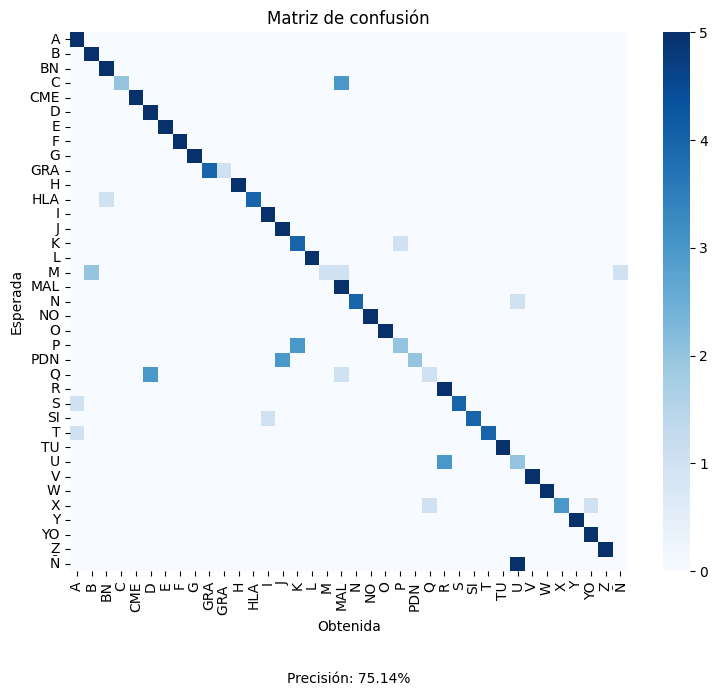

In [255]:
plt.figure(figsize=(9, 7))
sns.heatmap(confusion_matrix, cmap='Blues', fmt='g')
# Ajustar el tamaño del gráfico
# Agregar el título del gráfico
plt.title('Matriz de confusión')

# Agregar el porcentaje de aciertos en el gráfico
plt.text(0.5, -0.2, f'Precisión: {accuracy:.2%}', ha='center', va='center', transform=plt.gca().transAxes)

# Mostrar el gráfico
plt.show()

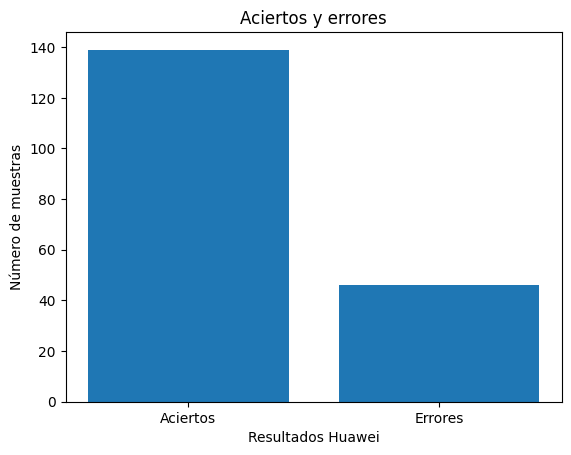

In [267]:
valores = [correct_predictions, incorrect_predictions]

# Crear una lista con las etiquetas de la gráfica
etiquetas = ['Aciertos', 'Errores']

# Crear la gráfica de barras
plt.bar(etiquetas, valores)

# Agregar título y etiquetas de los ejes
plt.title('Aciertos y errores')
plt.xlabel('Resultados Huawei')
plt.ylabel('Número de muestras')

# Mostrar la gráfica
plt.show()

In [227]:
from pandas import crosstab

# Crear una tabla cruzada para obtener la matriz de confusión
confusion_matrix = crosstab(df['SEÑA ESPERADA'], df['S8/5003'], rownames=['Esperada'], colnames=['Obtenida'])

# Calcular los aciertos y errores
total_samples = confusion_matrix.sum().sum()
correct_predictions = sum([confusion_matrix.iloc[i,i] for i in range(len(confusion_matrix))])
incorrect_predictions = total_samples - correct_predictions

# Calcular el porcentaje de aciertos
accuracy = correct_predictions / total_samples

# Imprimir la matriz de confusión y el porcentaje de aciertos
print('Matriz de confusión:\n', confusion_matrix)
print('Aciertos:', correct_predictions)
print('Errores:', incorrect_predictions)
print('Precisión:', accuracy)

Matriz de confusión:
 Obtenida  A  B  BN  C  CME  D  E  F  G  GRA  ...  T  TU  U  V  W  X  Y  YO  Z   
Esperada                                     ...                                
A         5  0   0  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0  \
B         0  5   0  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
BN        0  1   4  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
C         0  0   0  5    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
CME       0  0   0  0    5  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
D         0  0   0  0    0  5  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
E         0  0   0  0    0  0  4  0  0    0  ...  0   0  0  0  0  0  0   0  0   
F         0  0   0  0    0  0  0  5  0    0  ...  0   0  0  0  0  0  0   0  0   
G         0  0   0  0    0  0  0  0  5    0  ...  0   0  0  0  0  0  0   0  0   
GRA       0  0   0  0    0  0  0  0  0    5  ...  0   0  0  0  0  0  0   0  0   
H     

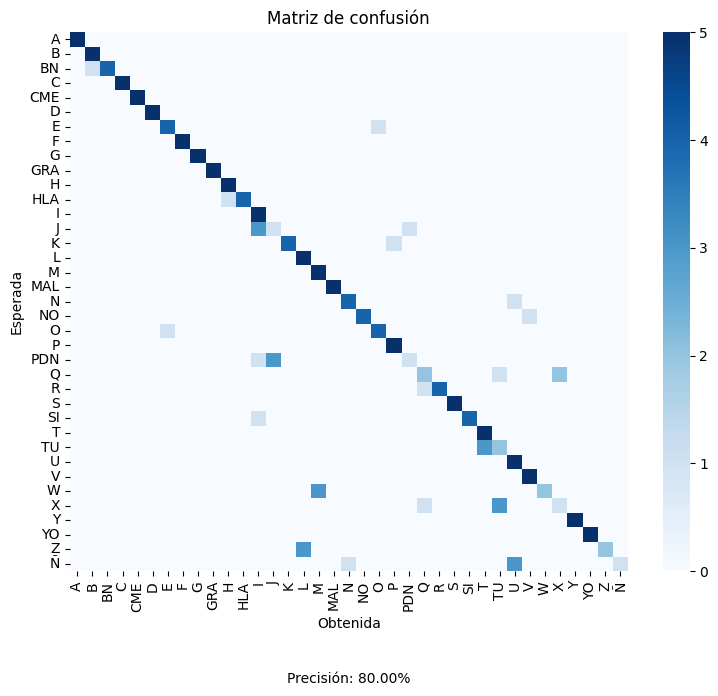

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 7))
sns.heatmap(confusion_matrix, cmap='Blues', fmt='g')
# Ajustar el tamaño del gráfico
# Agregar el título del gráfico
plt.title('Matriz de confusión')

# Agregar el porcentaje de aciertos en el gráfico
plt.text(0.5, -0.2, f'Precisión: {accuracy:.2%}', ha='center', va='center', transform=plt.gca().transAxes)

# Mostrar el gráfico
plt.show()

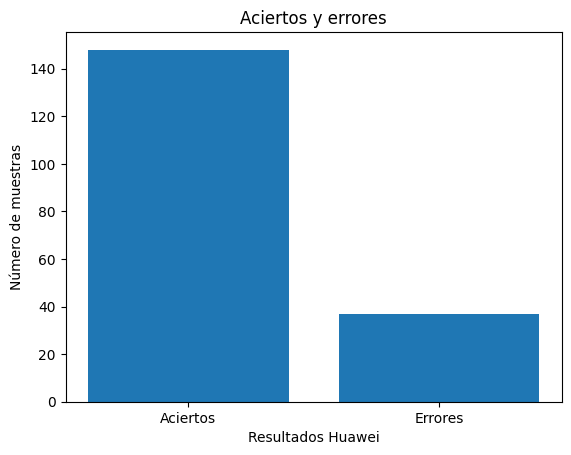

In [245]:
valores = [correct_predictions, incorrect_predictions]

# Crear una lista con las etiquetas de la gráfica
etiquetas = ['Aciertos', 'Errores']

# Crear la gráfica de barras
plt.bar(etiquetas, valores)

# Agregar título y etiquetas de los ejes
plt.title('Aciertos y errores')
plt.xlabel('Resultados Huawei')
plt.ylabel('Número de muestras')

# Mostrar la gráfica
plt.show()

In [246]:
from pandas import crosstab

# Crear una tabla cruzada para obtener la matriz de confusión
confusion_matrix = crosstab(df['SEÑA ESPERADA'], df['SAMSUNG-B/5000'], rownames=['Esperada'], colnames=['Obtenida'])

# Calcular los aciertos y errores
total_samples = confusion_matrix.sum().sum()
correct_predictions = sum([confusion_matrix.iloc[i,i] for i in range(len(confusion_matrix))])
incorrect_predictions = total_samples - correct_predictions

# Calcular el porcentaje de aciertos
accuracy = correct_predictions / total_samples

# Imprimir la matriz de confusión y el porcentaje de aciertos
print('Matriz de confusión:\n', confusion_matrix)
print('Aciertos:', correct_predictions)
print('Errores:', incorrect_predictions)
print('Precisión:', accuracy)


Matriz de confusión:
 Obtenida  A  B  BN  C  CME  D  E  F  G  GRA  ...  T  TU  U  V  W  X  Y  YO  Z   
Esperada                                     ...                                
A         5  0   0  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0  \
B         0  3   0  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
BN        0  0   5  0    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
C         0  0   0  5    0  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
CME       0  0   0  0    5  0  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
D         0  0   0  0    0  5  0  0  0    0  ...  0   0  0  0  0  0  0   0  0   
E         0  0   0  0    0  0  5  0  0    0  ...  0   0  0  0  0  0  0   0  0   
F         0  0   0  0    0  0  0  5  0    0  ...  0   0  0  0  0  0  0   0  0   
G         0  0   0  0    0  0  0  0  5    0  ...  0   0  0  0  0  0  0   0  0   
GRA       0  0   0  0    0  0  0  0  0    5  ...  0   0  0  0  0  0  0   0  0   
H     

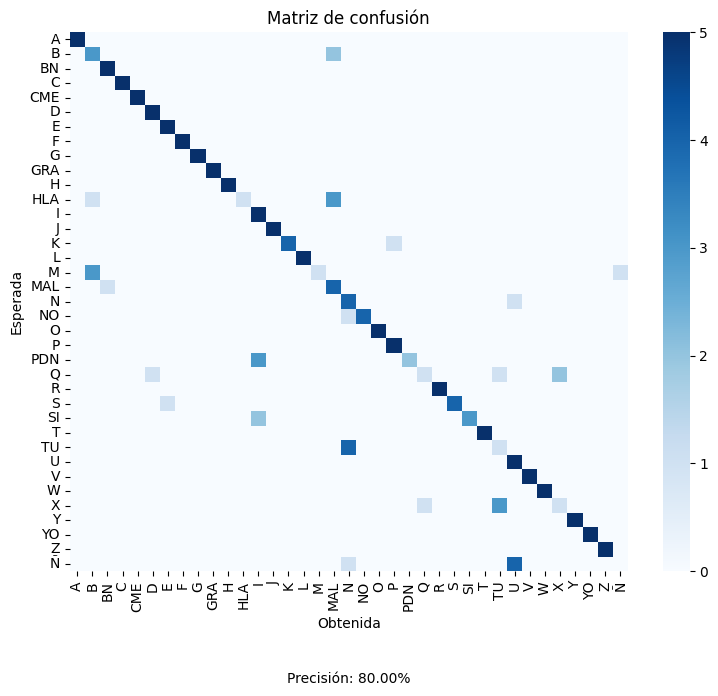

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 7))
sns.heatmap(confusion_matrix, cmap='Blues', fmt='g')
# Ajustar el tamaño del gráfico
# Agregar el título del gráfico
plt.title('Matriz de confusión')

# Agregar el porcentaje de aciertos en el gráfico
plt.text(0.5, -0.2, f'Precisión: {accuracy:.2%}', ha='center', va='center', transform=plt.gca().transAxes)

# Mostrar el gráfico
plt.show()

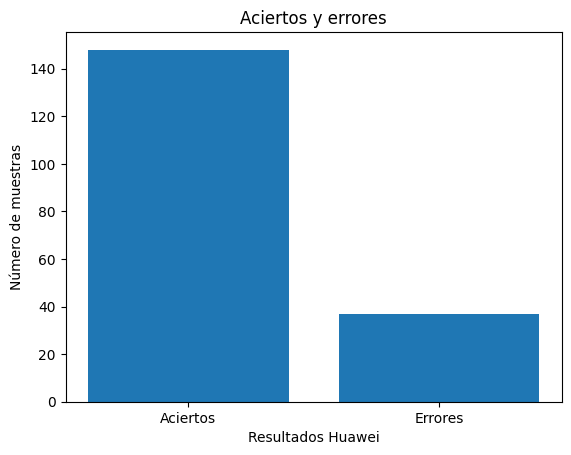

In [248]:
    valores = [correct_predictions, incorrect_predictions]

    # Crear una lista con las etiquetas de la gráfica
    etiquetas = ['Aciertos', 'Errores']

    # Crear la gráfica de barras
    plt.bar(etiquetas, valores)

    # Agregar título y etiquetas de los ejes
    plt.title('Aciertos y errores')
    plt.xlabel('Resultados Huawei')
    plt.ylabel('Número de muestras')

    # Mostrar la gráfica
    plt.show()

In [194]:
# Crear una tabla cruzada para obtener la matriz de confusión
confusion_matrix = pd.crosstab(df3['SEÑA ESPERADA'], df3['HUAWEI/5001'], rownames=['Esperada'], colnames=['Obtenida'])

# Calcular los aciertos y errores
total_samples = confusion_matrix.sum().sum()
correct_predictions = sum([confusion_matrix.iloc[i,i] for i in range(len(confusion_matrix))])
incorrect_predictions = total_samples - correct_predictions

# Calcular el porcentaje de aciertos
accuracy = correct_predictions / total_samples

# Imprimir la matriz de confusión y el porcentaje de aciertos
print('Matriz de confusión:\n', confusion_matrix)
print('Aciertos:', correct_predictions)
print('Errores:', incorrect_predictions)
print('Precisión:', accuracy)


IndexError: index 2 is out of bounds for axis 0 with size 2

In [164]:
from sklearn.metrics import confusion_matrix

# Obtener los arrays de numpy a partir del dataframe agrupado
y_true = grouped_data.index.values
y_pred = grouped_data.values.argmax(axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred)


ValueError: Mix of label input types (string and number)

In [165]:
y_true_str = grouped_data.index.values
y_true_num = np.array([int(s) for s in y_true_str])
y_pred = grouped_data.values.argmax(axis=1)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true_num, y_pred)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Señal predicha')
plt.ylabel('Señal esperada')
plt.show()


ValueError: invalid literal for int() with base 10: 'A'

In [ ]:
import pandas as pd

# Leer el dataframe
df = pd.read_csv('mi_archivo.csv')

# Convertir la columna a una serie de números enteros
df['my_column'] = df['my_column'].apply(lambda x: ''.join(filter(str.isdigit, str(x))))
df['my_column'] = pd.to_numeric(df['my_column'], errors='coerce').astype('Int64')
